In [1]:
model = 'wae'
d_model = 128
d_feedforward = 128
d_latent = 128
data_source = 'peptide'
epochs = 1
hardware = 'gpu'
property_predictor = 'ON'
type_property_predictor = 'deep_net'
train_props_path = 'data\\function_train.txt'
test_props_path = 'data\\function_test.txt'
#DDP
init_method = 'file:///D:/libtmp/file'
dist_backend = 'gloo' #on windows NCCL not supported
DDP = 'ON' #ON or OFF
%run scripts/train.py --model $model --d_model $d_model --d_feedforward $d_feedforward --d_latent $d_latent --data_source $data_source --epochs $epochs --hardware $hardware --init_method $init_method --dist_backend $dist_backend --DDP $DDP --property_predictor $property_predictor --type_property_predictor $type_property_predictor --train_props_path $train_props_path --test_props_path $test_props_path


main function called /n
train_parser function called /n
train function called /n
parser model_init called /n
{'ADAM_LR': 0.0003, 'ANNEAL_START': 0, 'BATCH_CHUNKS': 1, 'BATCH_SIZE': 50, 'BETA': 0.05, 'BETA_INIT': 1e-08, 'EPS_SCALE': 1, 'HARDWARE': 'gpu', 'LR_SCALE': 1, 'WARMUP_STEPS': 10000, 'INIT_METHOD': 'file:///D:/libtmp/file', 'DIST_BACKEND': 'gloo', 'WORLD_SIZE': 1, 'DISTRIBUTED': False, 'NUM_WORKERS': 0, 'DDP': True, 'DISCRIMINATOR_LAYERS': [640, 256], 'CHAR_WEIGHTS': tensor([0.8297, 0.7935, 0.8469, 0.8466, 0.9337, 0.8347, 0.8172, 0.8825, 0.8868,
        0.8697, 0.7926, 0.8549, 0.9855, 0.9683, 0.9080, 0.8134, 1.0000, 0.8835,
        0.9525, 0.8972, 0.1000, 0.9059]), 'CHAR_DICT': {'<start>': 0, 'A': 1, 'L': 2, 'V': 3, 'S': 4, 'Q': 5, 'C': 6, 'R': 7, 'P': 8, 'T': 9, 'E': 10, 'K': 11, 'I': 12, 'H': 13, 'W': 14, 'D': 15, 'G': 16, 'M': 17, 'F': 18, 'Y': 19, 'N': 20, '_': 21, '<end>': 22}, 'ORG_DICT': {0: 'A', 1: 'L', 2: 'V', 3: 'S', 4: 'Q', 5: 'C', 6: 'R', 7: 'P', 8: 'T', 9: 'E', 10: 

KeyboardInterrupt: 

<module 'matplotlib.pyplot' from 'C:\\Users\\s_renaud\\Anaconda3\\envs\\amp21\\lib\\site-packages\\matplotlib\\pyplot.py'>

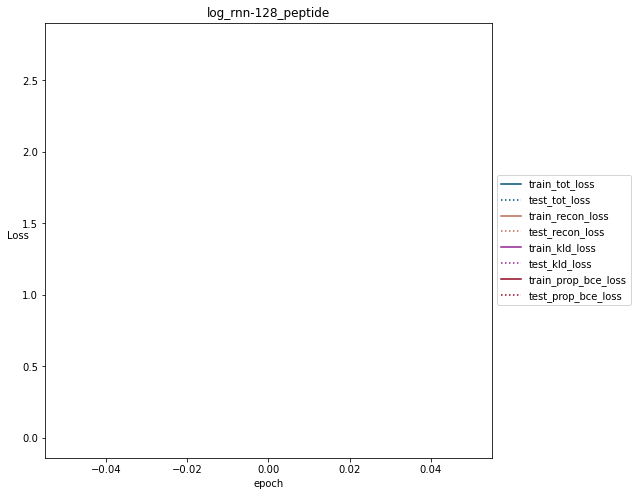

In [1]:
from transvae import analysis
#loss ploting
src = 'trials//log_rnn-128_peptide.txt'
analysis.plot_loss_by_type(src)#, loss_type = 'kld_loss', data_type='test')

In [2]:
#extracting attention weights
%run scripts/attention.py --model transvae --model_ckpt checkpointz\\trans_amp\\2000_trans1x-128_peptide.ckpt --mols notebooks\\example_data\\peptides.txt --save_path "attn_weights"

attn parser function called /n
None


G:\GitHub\MSCSAM_TBD\main_model\transvae\trans_models.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.params['CHAR_WEIGHTS'] = torch.tensor(self.params['CHAR_WEIGHTS'], dtype=torch.float)


AssertionError: EGFQLMDRGTFDEIGR could not be joined